100%|██████████| 1531/1531 [01:06<00:00, 23.09it/s] 


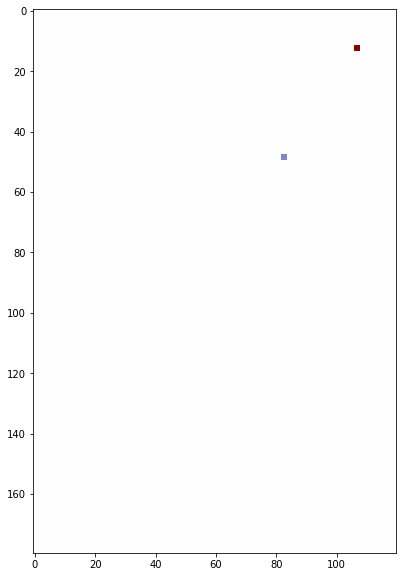

In [19]:
from hsqc_dataset import *
from tqdm import tqdm
import json
f = open('/root/autoencoder_denoiser/configs_baseline_selection/dann_adv_loss.json')
config = json.load(f)
# test_loader = DataLoader(RealNoiseDataset_Byeol(config), batch_size=2, shuffle=False, num_workers=1)
train_loader,_,test_loader = get_datasets(config)
import matplotlib.pyplot as plt


import matplotlib.image

clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)
raw_image_collection = []
noise_image_collection = []
plt.rcParams["figure.figsize"] = (20,10)
for iter, data in enumerate(tqdm(train_loader)):
    r, noise = data
    # plt.imshow(raw[0,0],cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    # plt.figure()
    # plt.imshow(noise[0,0],cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    # plt.figure()
    # if iter == 1: break
    raw = r[0,0]
    plt.imshow(raw,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    signal_position = np.where(raw!=0)
    signal_enhance = 1
    for i in range(0, signal_enhance+1):
        for j in range(0, signal_enhance+1):
            if i==0 and j==0: continue
            new_position = np.clip(signal_position[0]+i, 0, raw.shape[0]-1) ,  np.clip(signal_position[1]+j , 0, raw.shape[1]-1)  
            raw[new_position] += raw[signal_position]
plt.imshow(raw,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)


In [14]:

# import matplotlib.image


# clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
# custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)
# for iter, data in enumerate(tqdm(test_loader)):
#     large_image, raw = data
#     print(type(raw))
#     print(raw.shape)
#     plt.imshow(raw[0],cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     plt.imshow(large_image[0],cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     break

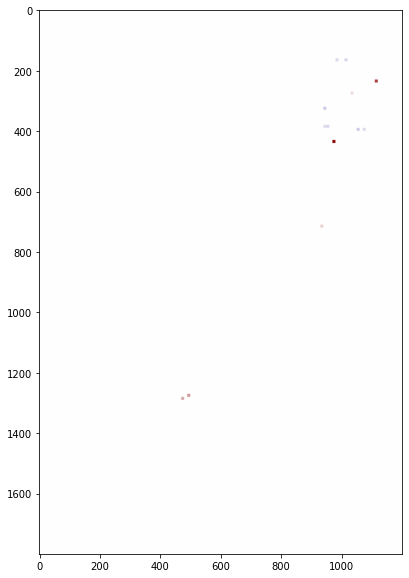

In [33]:

upscale_factor = 10
large_image = cv2.resize(noise[0], (noise.shape[2]*upscale_factor,noise.shape[1]*upscale_factor), interpolation = cv2.INTER_AREA   ) 
plt.imshow(large_image,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)

In [36]:
np.sum(noise)

1.6831636

In [37]:
np.sum(large_image)

168.31636

In [10]:
w.a

0

In [5]:
import torch
a = torch.tensor([1,2,3,4])
b = torch.tensor([1,2,3,4])
k =torch.logical_and (a>2 , b<4) 
a[k] = 88
a

tensor([ 1,  2, 88,  4])

In [6]:
import torch
a = torch.tensor([1,2,3,4,5])
k = a.shape
k

torch.Size([5])

In [7]:
k[0]

5